<a href="https://colab.research.google.com/github/Patsonu63/practice/blob/main/Global_Air_Quality_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/global_air_quality_data_10000.csv'  # Update this with the actual path to your dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())


             City   Country        Date   PM2.5    PM10    NO2    SO2    CO  \
0         Bangkok  Thailand  2023-03-19   86.57   25.19  99.88  30.63  4.46   
1        Istanbul    Turkey  2023-02-16   50.63   97.39  48.14   8.71  3.40   
2  Rio de Janeiro    Brazil  2023-11-13  130.21   57.22  98.51   9.92  0.12   
3          Mumbai     India  2023-03-16  119.70  130.52  10.96  33.03  7.74   
4           Paris    France  2023-04-04   55.20   36.62  76.85  21.85  2.00   

       O3  Temperature  Humidity  Wind Speed  
0   36.29        17.67     59.35       13.76  
1  144.16         3.46     67.51        6.36  
2  179.31        25.29     29.30       12.87  
3   38.65        23.15     99.97        7.71  
4   67.09        16.02     90.28       14.16  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Coun

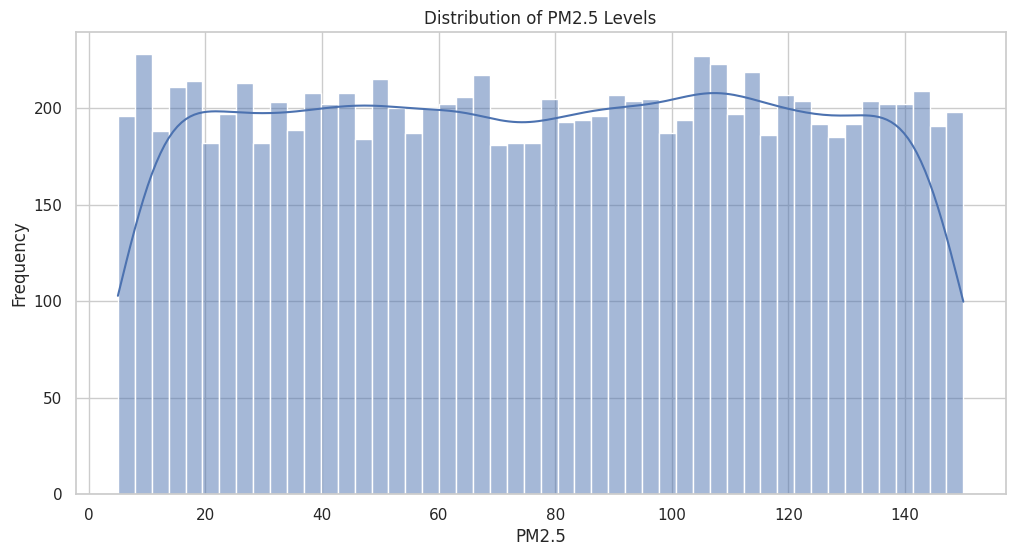

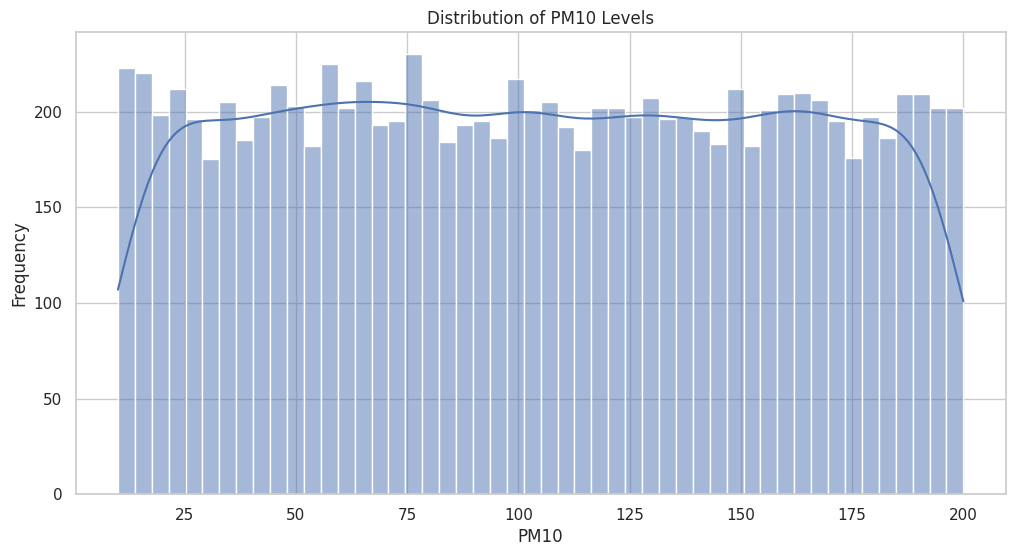

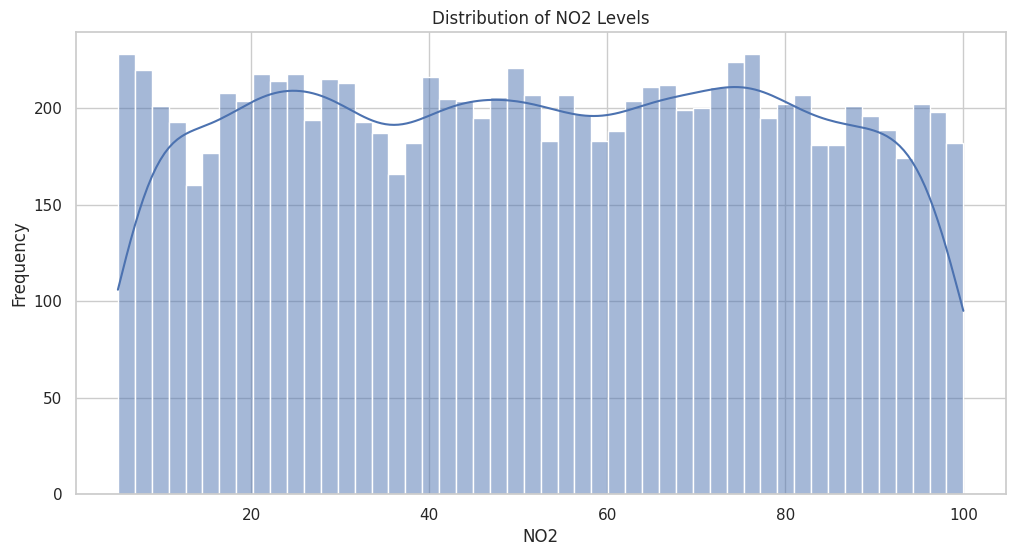

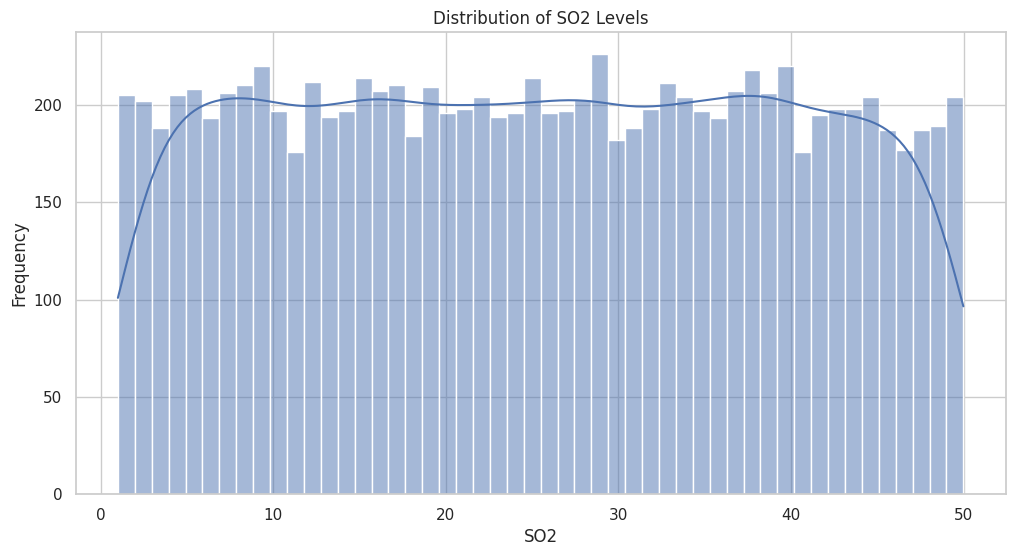

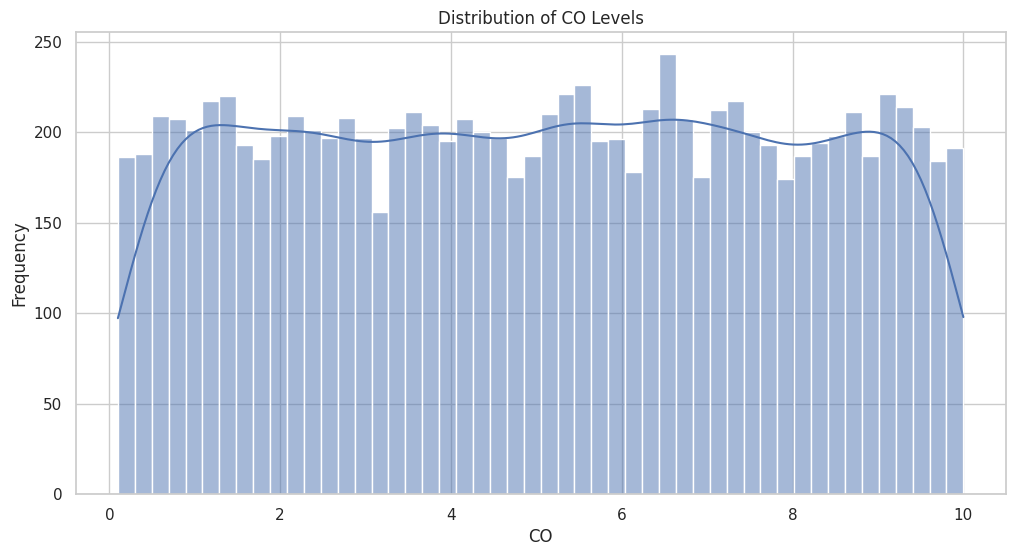

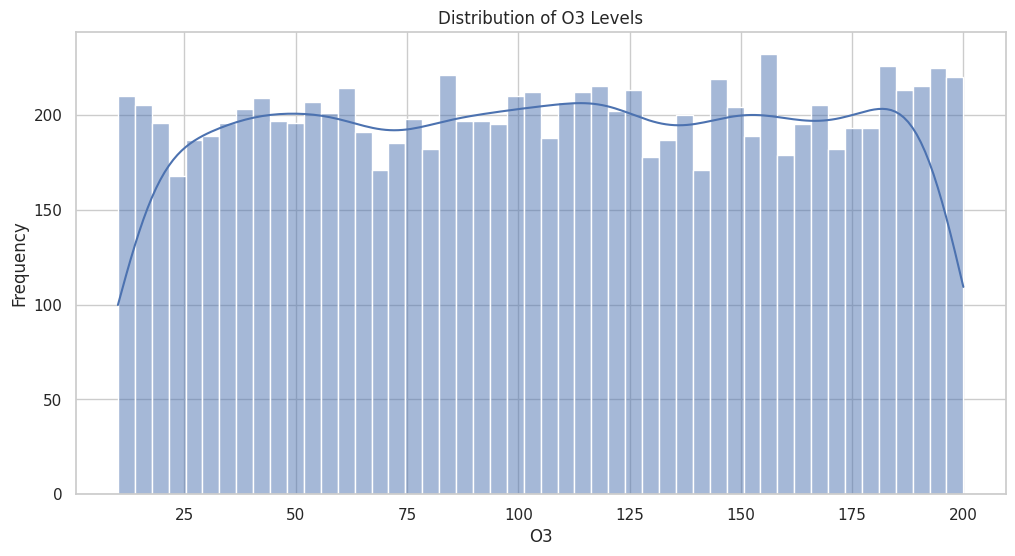

In [20]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the distribution of PM2.5
plt.figure(figsize=(12, 6))
sns.histplot(data['PM2.5'].dropna(), bins=50, kde=True)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of PM10
plt.figure(figsize=(12, 6))
sns.histplot(data['PM10'].dropna(), bins=50, kde=True)
plt.title('Distribution of PM10 Levels')
plt.xlabel('PM10')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of NO2
plt.figure(figsize=(12, 6))
sns.histplot(data['NO2'].dropna(), bins=50, kde=True)
plt.title('Distribution of NO2 Levels')
plt.xlabel('NO2')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of SO2
plt.figure(figsize=(12, 6))
sns.histplot(data['SO2'].dropna(), bins=50, kde=True)
plt.title('Distribution of SO2 Levels')
plt.xlabel('SO2')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of CO
plt.figure(figsize=(12, 6))
sns.histplot(data['CO'].dropna(), bins=50, kde=True)
plt.title('Distribution of CO Levels')
plt.xlabel('CO')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of O3
plt.figure(figsize=(12, 6))
sns.histplot(data['O3'].dropna(), bins=50, kde=True)
plt.title('Distribution of O3 Levels')
plt.xlabel('O3')
plt.ylabel('Frequency')
plt.show()


In [26]:
data.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


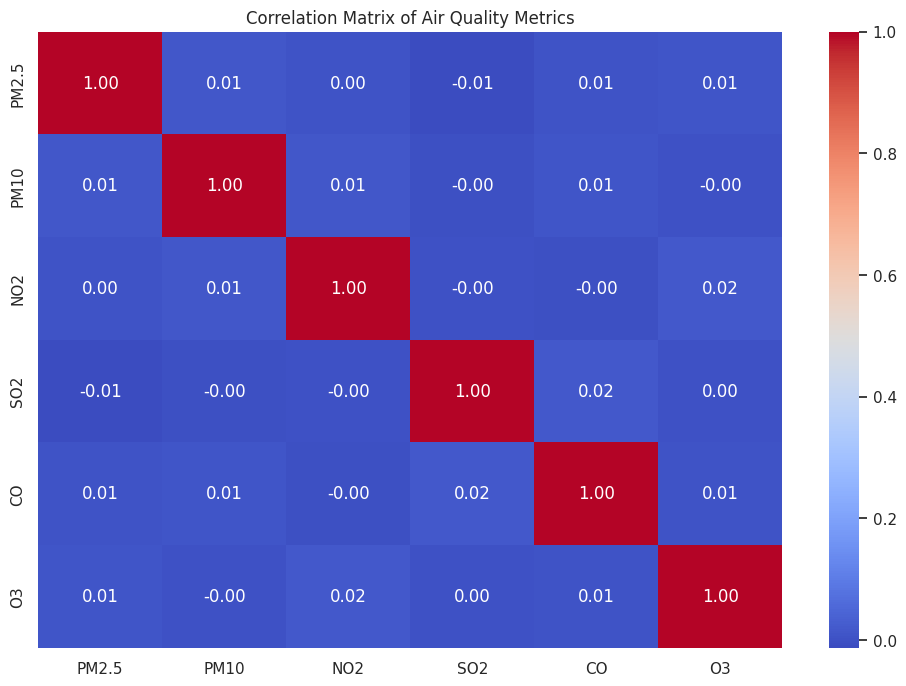

In [32]:
# Compute the correlation matrix
corr_matrix = data[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].dropna().corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Air Quality Metrics')
plt.show()


<Figure size 1400x800 with 0 Axes>

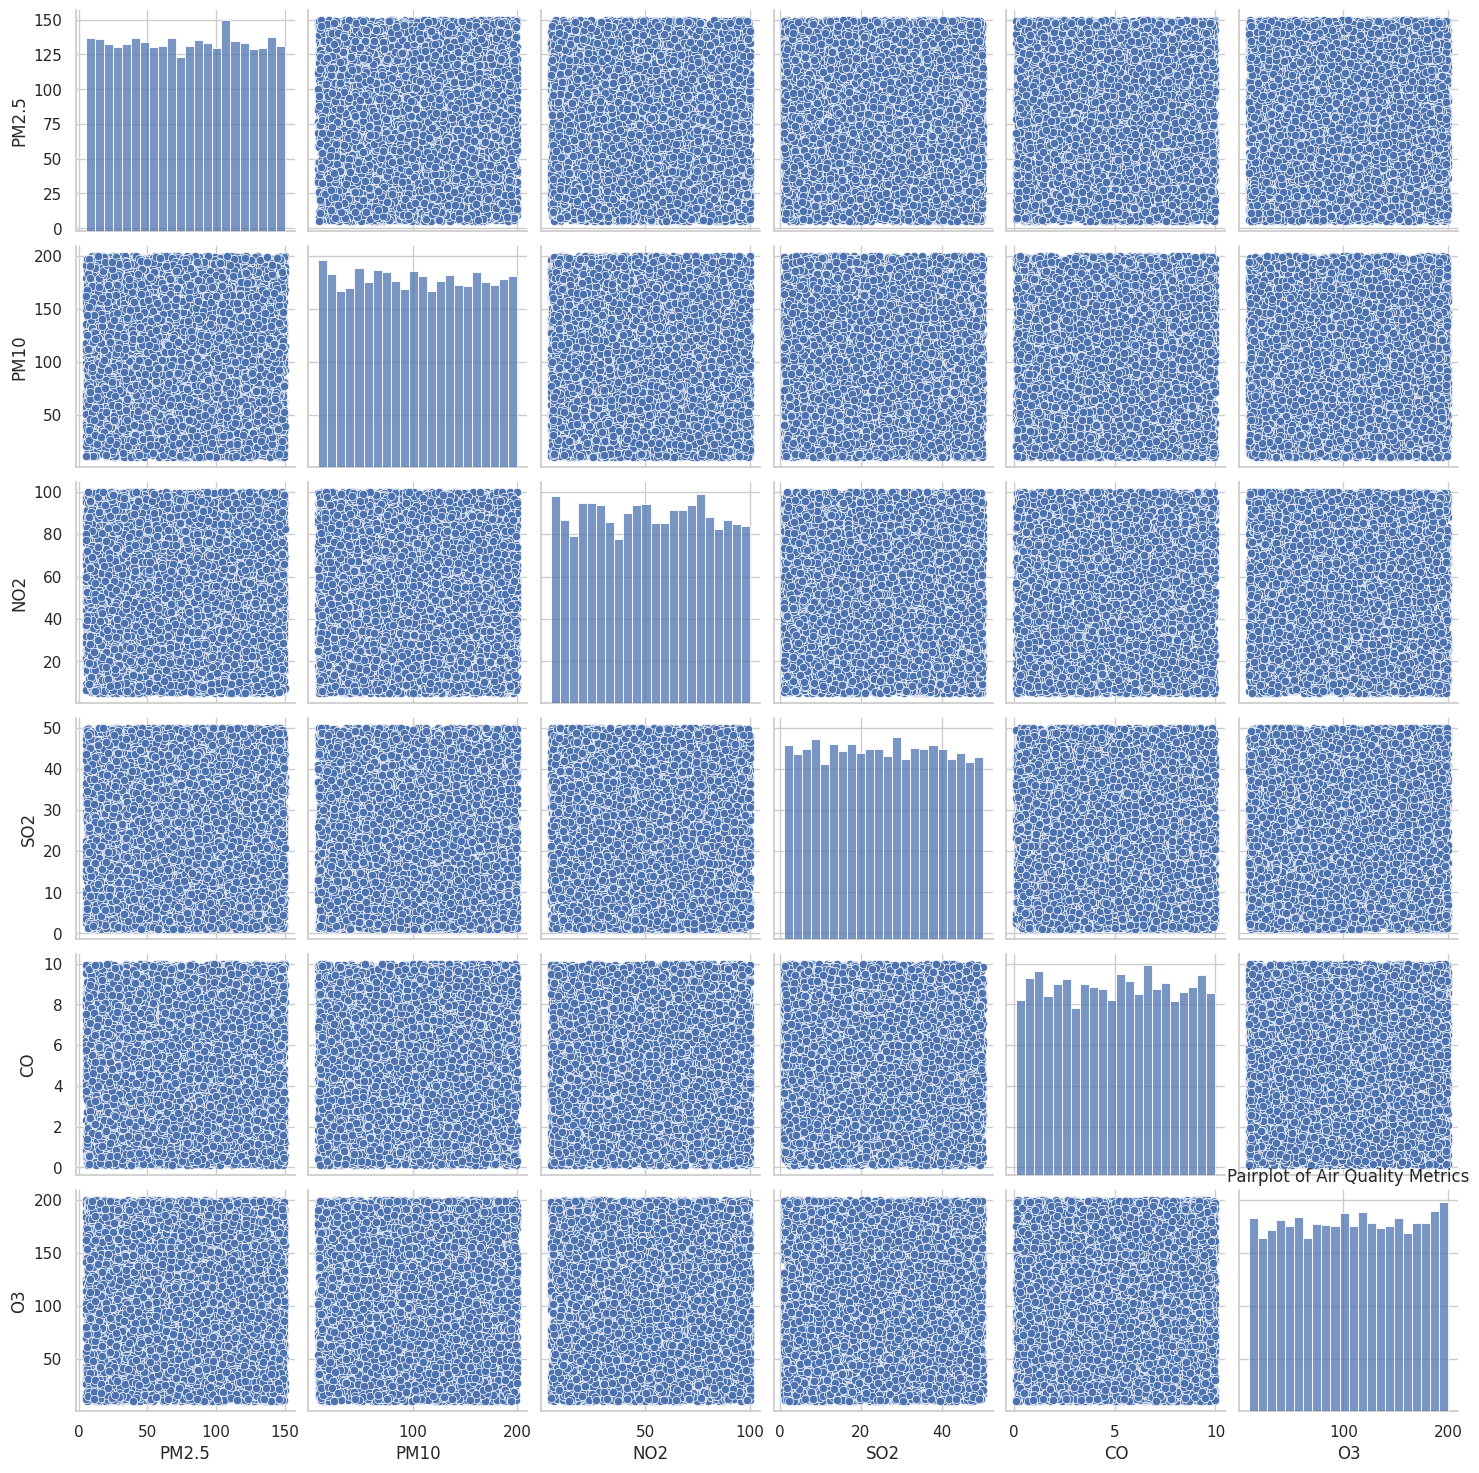

In [33]:
# Pairplot to visualize relationships between air quality metrics
plt.figure(figsize=(14, 8))
sns.pairplot(data[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].dropna())
plt.title('Pairplot of Air Quality Metrics')
plt.show()


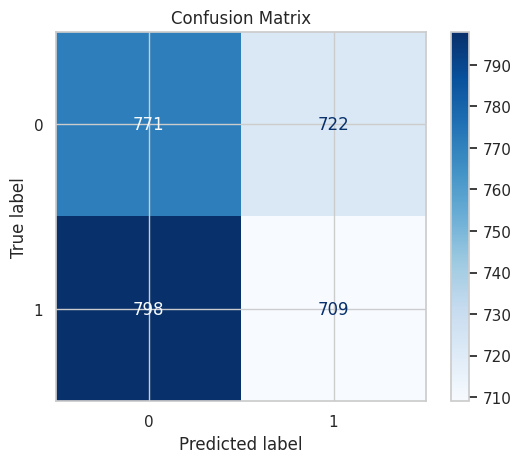

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example: Creating a binary classification task based on PM2.5 levels
# (This is just an example; adjust according to your actual problem)
data['High_PM2.5'] = (data['PM2.5'] > data['PM2.5'].median()).astype(int)  # Binary target variable
features = ['PM10', 'NO2', 'SO2', 'CO', 'O3']
X = data[features].dropna()
y = data['High_PM2.5'].dropna()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
